Descriptive Statistics:
             price          age
count  3652.000000  3652.000000
mean    258.272453    30.001369
std      88.491679     6.102543
min     131.000000    20.000000
25%     201.000000    25.000000
50%     221.000000    30.000000
75%     302.250000    35.000000
max     500.000000    40.000000

Appointments per Client:
count    1044.000000
mean        3.498084
std         1.501995
min         2.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: appointment_id, dtype: float64

Gender Distribution:
gender
F    0.834885
M    0.165115
Name: proportion, dtype: float64

Style Distribution:
style
Fineline     0.745893
Blackwork    0.254107
Name: proportion, dtype: float64


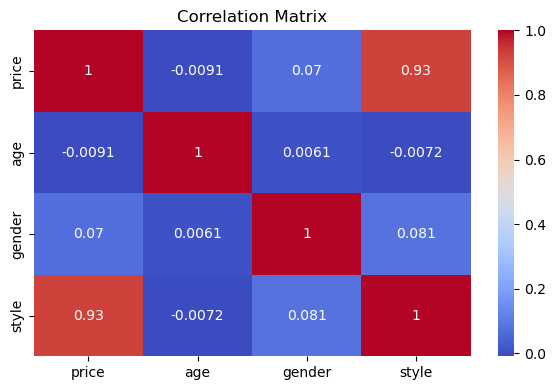

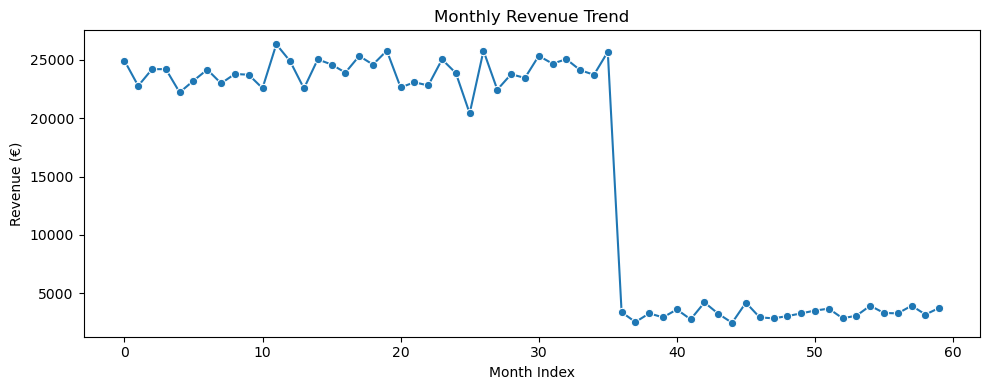

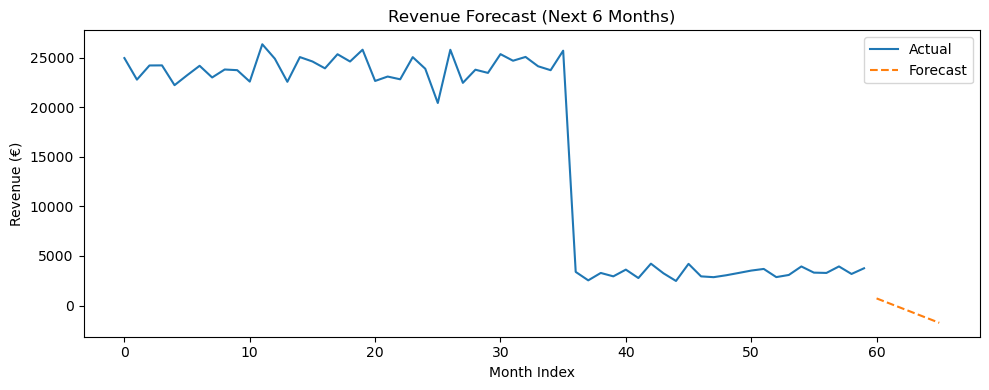

In [3]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 📥 Load data
df = pd.read_csv(r'C:\Users\bruna\Desktop\Data Science Projects\InkSight\data\appointments_extended.csv')
df['date'] = pd.to_datetime(df['date'])

# 📆 Extract time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.to_period('M')

# 📊 Descriptive statistics
print("Descriptive Statistics:")
print(df[['price', 'age']].describe())

# 🧮 Appointments per client
client_counts = df.groupby('client_id')['appointment_id'].count()
print("\nAppointments per Client:")
print(client_counts.describe())

# 🎯 Gender and style proportions
print("\nGender Distribution:")
print(df['gender'].value_counts(normalize=True))

print("\nStyle Distribution:")
print(df['style'].value_counts(normalize=True))

# 🔗 Correlation matrix
df_encoded = df.copy()
df_encoded['gender'] = df_encoded['gender'].map({'F': 0, 'M': 1})
df_encoded['style'] = df_encoded['style'].map({'Fineline': 0, 'Blackwork': 1})
corr = df_encoded[['price', 'age', 'gender', 'style']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 📈 Monthly revenue trend
monthly_revenue = df.groupby('month')['price'].sum().reset_index()
monthly_revenue['month_num'] = np.arange(len(monthly_revenue))

plt.figure(figsize=(10, 4))
sns.lineplot(data=monthly_revenue, x='month_num', y='price', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month Index')
plt.ylabel('Revenue (€)')
plt.tight_layout()
plt.show()

# 📉 Linear regression forecast
X = monthly_revenue[['month_num']]
y = monthly_revenue['price']
model = LinearRegression()
model.fit(X, y)

future_months = pd.DataFrame({'month_num': np.arange(len(monthly_revenue), len(monthly_revenue)+6)})
future_preds = model.predict(future_months)

plt.figure(figsize=(10, 4))
plt.plot(monthly_revenue['month_num'], y, label='Actual')
plt.plot(future_months['month_num'], future_preds, label='Forecast', linestyle='--')
plt.title('Revenue Forecast (Next 6 Months)')
plt.xlabel('Month Index')
plt.ylabel('Revenue (€)')
plt.legend()
plt.tight_layout()
plt.show()